In [44]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Read Data

In [31]:
url = 'https://raw.githubusercontent.com/lephanthutra/PCA-Principle-Components-Analysis/main/Mid-term.csv'
df = pd.read_csv(url)
df

,X1,X2
0,12.69,1.86
1,12.85,1.80
2,13.20,1.83
3,13.61,1.80
4,13.51,1.74
5,13.75,1.83
6,13.38,1.80
7,13.55,1.80
8,13.63,1.83
9,13.25,1.77


# Before PCA

In [3]:
# calculate correlation
corr_mat = df.corr()
corr_mat

,X1,X2
X1,1.000000,-0.279545
X2,-0.279545,1.000000


In [4]:
# calculate covariance
cov_mat = df.cov()
cov_mat

,X1,X2
X1,0.121107,-0.003313
X2,-0.003313,0.001160


In [6]:
# function to calculate eigenvector and eigenvalues
eigen_val, eigen_vec = LA.eig(cov_mat)

# eigenvalues
print("Eigenvalues:\n", eigen_val)

# eigenvectors
print("\nEigenvectors:\n", eigen_vec)

Eigenvalues:
 [0.12119812 0.00106854]

Eigenvectors:
 [[ 0.99961927  0.02759183]
 [-0.02759183  0.99961927]]


# Standardize data

In [22]:
# create scaler
scaler = StandardScaler()

# standardize data
st_data = scaler.fit_transform(df)
st_df = pd.DataFrame(st_data, columns = ['Stardardized_X1', 'Standardized_X2'])
st_df

,Stardardized_X1,Standardized_X2
0,-1.974887,1.671258
1,-1.490252,-0.185695
2,-0.430113,0.742781
3,0.811763,-0.185695
4,0.508867,-2.042649
5,1.235819,0.742781
6,0.115101,-0.185695
7,0.630025,-0.185695
8,0.872343,0.742781
9,-0.278665,-1.114172


# Apply PCA

In [41]:
# create pca with 2 components
pca = PCA(n_components=2)

# apply pca to dataset
new_data = pca.fit_transform(df)
new_df = pd.DataFrame(new_data, columns = ['NewX1', 'NewX2'])
new_df

,NewX1,NewX2
0,0.653242,-0.035990
1,0.491647,0.019573
2,0.142608,-0.020073
3,-0.268064,-0.001397
4,-0.169757,0.061339
5,-0.407182,-0.035248
6,-0.038151,0.004949
7,-0.208086,0.000259
8,-0.287228,-0.031937
9,0.090972,0.038525


# After PCA

In [42]:
# correlation
new_corr_mat = new_df.corr().round(5)
new_corr_mat

,NewX1,NewX2
NewX1,1.0,-0.0
NewX2,-0.0,1.0


In [47]:
# covariance
new_cov_mat = new_df.cov().round(5)
new_cov_mat

,NewX1,NewX2
NewX1,0.1212,-0.00000
NewX2,-0.0000,0.00107


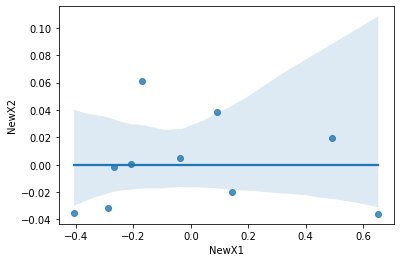

In [45]:
# plot the scores for the first two components
fig = sns.regplot(data = new_df, x = 'NewX1', y = 'NewX2')